In [1]:
import numpy as np
import pandas as pd
#from IPython.display import display, HTML, Image, Javascript, Markdown, SVG
from scipy.stats import norm, pearsonr
import plotly.express as px
from sklearn.metrics import accuracy_score,  cohen_kappa_score 
import plotly.express as px

C:\Users\jichen\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [27]:
def optimal_cut (data,ptile,level_number):# ptile is the percentile for the distribution,
    # e.g. ptile = 25 for the first cut of the uniform distribution
    # e.g. level_number = '12' for the first cut of the distribution
    if ptile - 10 < 0:
        ptile_minus10 = 0
    else:
        ptile_minus10 = ptile - 10
    cut_range_low = round(np.percentile(data.difficulty_parameter,ptile_minus10),1)  # Starting number

    if ptile + 10 > 100:
        ptile_add10 = 100
    else:
        ptile_add10 = ptile + 10
    cut_range_high = round(np.percentile(data.difficulty_parameter,ptile_add10),1)  # Ending number
    
    accuracy_table = []
    #----------------------
    step_size = 0.01  # Desired step size between values
    cut_values = np.arange(cut_range_low, cut_range_high, step_size)
    cut_values = np.round(cut_values,2)
    for cut in cut_values:
        data.loc[data.difficulty_parameter < cut,'level'+level_number] = 'low'
        data.loc[data.difficulty_parameter >= cut,'level'+level_number] = 'high'
        #print(cut1,accuracy_score(df['ALD12'], df['level12']))
        accuracy_table.append((cut,accuracy_score(data['ALD'+level_number], data['level'+level_number])))
    accuracy_table = pd.DataFrame(accuracy_table).rename(columns = {0:'Cut',1:'accuracy'}) # accuracy table for all cuts
    accuracy_max = accuracy_table.loc[accuracy_table.accuracy == accuracy_table.accuracy.max(),:] # find out the max accuracy
    optimal_cutoff = round(accuracy_max.Cut.mean(),2)
    return (optimal_cutoff)

In [4]:
def generate_discrete_data(rho,n,ptile1,ptile2,ptile3):
    mean = (0, 0)
    cov = [[1, rho], [rho, 1]]
    v = np.random.multivariate_normal(mean, cov, (n))
    x = v[:,0]
    y = v[:,1]
    x_cut1 = np.percentile(x,ptile1)
    x_cut2 = np.percentile(x,ptile2)
    x_cut3 = np.percentile(x,ptile3)
    x[x < x_cut1]=1
    x[(x >= x_cut1)*(x < x_cut2)*(x !=1)] = 2
    x[(x >= x_cut2)*(x < x_cut3)*(x !=1)*(x !=2)] = 3
    x[(x >= x_cut3)*(x !=1)*(x !=2)*(x!=3)] = 4
    
    rho_out = pearsonr(x,y)[0] 
    df = pd.DataFrame([x,y]).T
    df.columns=['ALDs','difficulty_parameter']
    fig = px.scatter(df,x='ALDs',y='difficulty_parameter',marginal_y='histogram',color='ALDs'\
                   ,trendline='ols',title='Correlation: '+str(rho_out)[0:4])
    fig.update_layout(width=800, height=500)
    # fig.show()
    return df

In [5]:
df = generate_discrete_data(0.8,1000, 15, 50, 85)

In [ ]:
#pip install --upgrade --user seaborn pandas

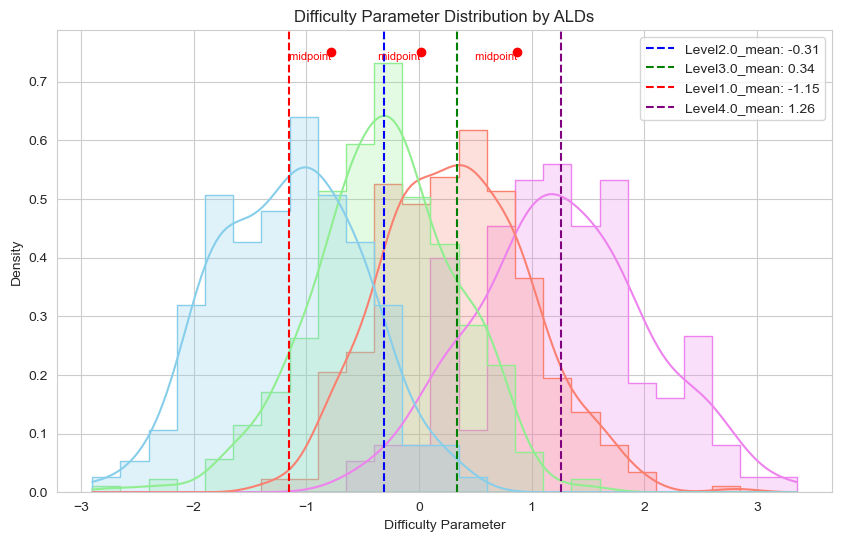

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming df is your DataFrame and it has been defined above this code block

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a custom palette for the histograms
custom_palette = ['skyblue', 'lightgreen', 'salmon', 'violet']  # Custom colors for each ALDs level

# Plotting the histograms with KDE and using the custom palette for colors
sns.histplot(df, x='difficulty_parameter', hue='ALDs', element='step', stat='density', common_norm=False, kde=True, palette=custom_palette)

# Calculate and plot the mean lines for each ALD
ald_levels = df['ALDs'].unique()
colors = ['blue', 'green', 'red', 'purple']  # Colors for the mean lines, differentiate from histogram colors if desired
for i, ald_level in enumerate(ald_levels):
    mean_val = df.loc[df['ALDs'] == ald_level, 'difficulty_parameter'].mean()
    plt.axvline(x=mean_val, color=colors[i], linestyle='--', label=f'Level{ald_level}_mean: {mean_val:.2f}')
    
mean1 = -1.2
mean2 = -0.36
mean3 = 0.39
mean4 = 1.35
cut1 = (mean1+mean2)/2
cut2 = (mean2+mean3)/2
cut3 = (mean3+mean4)/2

plt.plot(cut1, 0.75, marker = 'o', color='red')#marker='o',
# Label the red dot as 'midpoint'
plt.text(cut1, 0.75, ' midpoint', verticalalignment='top', horizontalalignment='right', color='red', fontsize=8)

plt.plot(cut2, 0.75, marker = 'o', color='red')#marker='o',
# Label the red dot as 'midpoint'
plt.text(cut2, 0.75, ' midpoint', verticalalignment='top', horizontalalignment='right', color='red', fontsize=8)

plt.plot(cut3, 0.75, marker = 'o', color='red')#marker='o',
# Label the red dot as 'midpoint'
plt.text(cut3, 0.75, ' midpoint', verticalalignment='top', horizontalalignment='right', color='red', fontsize=8)


plt.legend()

plt.legend()
plt.title('Difficulty Parameter Distribution by ALDs')
plt.xlabel('Difficulty Parameter')
plt.ylabel('Density')

plt.show()



In [23]:
df = generate_discrete_data(0.8,1000, 15, 50, 85)

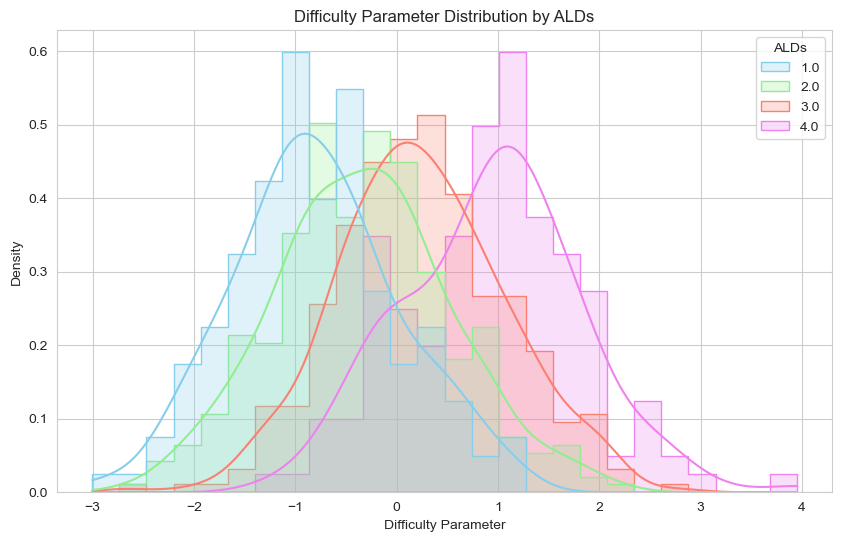

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming df is your DataFrame and it has been defined above this code block

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a custom palette for the histograms
custom_palette = ['skyblue', 'lightgreen', 'salmon', 'violet']  # Custom colors for each ALDs level

# Plotting the histograms with KDE and using the custom palette for colors
sns.histplot(df, x='difficulty_parameter', hue='ALDs', element='step', stat='density', common_norm=False, kde=True, palette=custom_palette)

plt.title('Difficulty Parameter Distribution by ALDs')
plt.xlabel('Difficulty Parameter')
plt.ylabel('Density')

plt.show()



In [71]:
ptile1 = 15
ptile2 = 50
ptile3 = 85
df = generate_discrete_data(0.8,1000, ptile1, ptile2, ptile3)

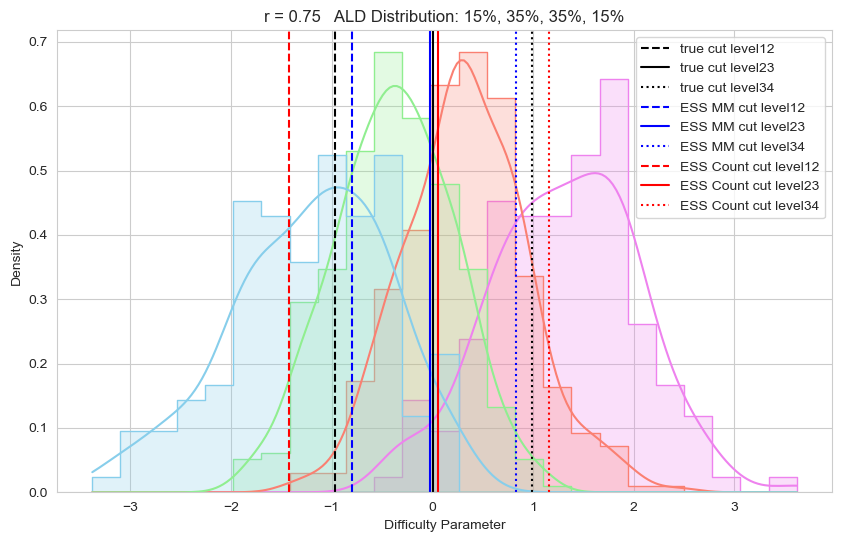

In [73]:


df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming df is your DataFrame and it has been defined above this code block

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a custom palette for the histograms
custom_palette = ['skyblue', 'lightgreen', 'salmon', 'violet']  # Custom colors for each ALDs level

# Plotting the histograms with KDE and using the custom palette for colors
sns.histplot(df, x='difficulty_parameter', hue='ALDs', element='step', stat='density', \
             common_norm=False, kde=True, palette=custom_palette, bins = 25)

#-------percentile cuts---------------------
ptile_cut1 = round(np.percentile(df.difficulty_parameter,ptile1),2)
ptile_cut2 = round(np.percentile(df.difficulty_parameter,ptile2),2)
ptile_cut3 = round(np.percentile(df.difficulty_parameter,ptile3),2)

plt.axvline(x= ptile_cut1, color='black', linestyle='--', label= 'true cut level12')
plt.axvline(x= ptile_cut2, color='black', linestyle= 'solid', label= 'true cut level23')
plt.axvline(x= ptile_cut3, color='black', linestyle=':', label= 'true cut level34')

#----MM cuts--------------------
mean1 = df.loc[df.ALDs == 1,'difficulty_parameter'].mean()
mean2 = df.loc[df.ALDs == 2,'difficulty_parameter'].mean()
mean3 = df.loc[df.ALDs == 3,'difficulty_parameter'].mean()
mean4 = df.loc[df.ALDs == 4,'difficulty_parameter'].mean()
mm_cut1 = (mean1+mean2)/2
mm_cut2 = (mean2+mean3)/2
mm_cut3 = (mean3+mean4)/2
    
plt.axvline(x= mm_cut1, color='blue', linestyle='--', label= 'ESS MM cut level12')
plt.axvline(x= mm_cut2, color='blue', linestyle='solid', label= 'ESS MM cut level23')
plt.axvline(x= mm_cut3, color='blue', linestyle=':', label= 'ESS MM cut level34')

#--ESS count cuts---------------------------
df.loc[df.ALDs ==1, 'ALD12'] = 'low' # recode ALDs to low or high for each ALD cut
df.loc[df.ALDs > 1, 'ALD12'] = 'high'
df.loc[df.ALDs <=2, 'ALD23'] = 'low'
df.loc[df.ALDs > 2, 'ALD23'] = 'high'
df.loc[df.ALDs <=3, 'ALD34'] = 'low'
df.loc[df.ALDs > 3, 'ALD34'] = 'high'
count_cut1 = optimal_cut(df,ptile1,'12') 
count_cut2 = optimal_cut(df,ptile2,'23') 
count_cut3 = optimal_cut(df,ptile3,'34') 
plt.axvline(x= count_cut1, color='red', linestyle='--', label= 'ESS Count cut level12')
plt.axvline(x= count_cut2, color='red', linestyle='solid', label= 'ESS Count cut level23')
plt.axvline(x= count_cut3, color='red', linestyle=':', label= 'ESS Count cut level34')

plt.legend()
plt.title('r = 0.75   ALD Distribution: 15%, 35%, 35%, 15%')
plt.xlabel('Difficulty Parameter')
plt.ylabel('Density')

plt.show()

